# Introducción a la Inteligencia Artificial

## CLASE 3

## Referencias

- [Cheatsheet de Latex](https://www.caam.rice.edu/~heinken/latex/symbols.pdf)
- [DRIVE](https://drive.google.com/drive/folders/1TDRvlwfSgLI39gHXgVhWlSaRJ-aTSaDE?usp=sharing)

## Comentarios sobre el estado del documento



## Importar librerías

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split

# MATPLOTLIB & SNS
# from mpl_toolkits import mplot3d
# from matplotlib import cm
# from matplotlib_venn import venn2
# import seaborn as sns

# MATH & RANDOM
# import math
# import numpy.random as random
# import scipy.stats as stats
# random.seed(42)

#PANDAS
# import pandas as pd

# %matplotlib inline

In [252]:
# Ejercicio 1 


FILE_PATH = "C:/Users/jota_/00_Especialización_IA/00_Recursos/01_DataSets/income.data.csv"
# vertical stack para agregar la columna de 1

"""
Consigna:

1. Escribir una clase dataset que levante los datos en un numpy array estructurado
2. La clase tiene que tener un metodo para separar los datos en 80% train y 20% test
3. Hacer una clase que implemente regresion lineal
4. Regresion lineal con b
5. Prediccion
6. Graficos
7. ECM
"""
    
class Data(object):

    def __init__(self, path):
        self.dataset = self._build_dataset(path)

    def split(self, percentage):
        # divides the dataset by permutating, masking and slicing into train and split
        SIZE = self.dataset.shape[0]
        data_total = self.dataset
        idx = np.arange(0, SIZE)
        
        # permutate
        perm_idx = np.random.permutation(idx)
        
        # generate index slice
        train_idx = perm_idx[:int(SIZE * percentage)]
        test_idx = perm_idx[int(SIZE * percentage):]
        
        # slice dataset
        train_data = data_total[train_idx]
        test_data = data_total[test_idx]
        
        def vector_creator(vector, dataset):
            x = dataset[vector].reshape(dataset[vector].shape[0], 1)
            return x
        
        X_train = vector_creator('X', train_data)
        y_train = vector_creator('y', train_data)
        X_test = vector_creator('X', test_data)
        y_test = vector_creator('y', test_data)

        return X_train, y_train, X_test, y_test

    def _build_dataset(self, path):
        ## creates structured array
        structure = [('X', np.float32), ('y', np.float32)]
        structure = np.dtype(structure)
        # load numpy array from disk using a generator
        with open(path, encoding="utf8") as file:
                    data_gen = ((line.split(',')[1], line.split(',')[2]) 
                                for line in file if not line.split(',')[1][2].isalpha())
                    data_total = np.fromiter(data_gen, structure)
        
        return data_total


    
class BaseModel(object):

    def __init__(self):
        self.model = None

    def fit(self, X, y):
        # train del model
        return NotImplemented

    def predict(self, X):
        # return Y hat
        return NotImplemented


    
class LinearRegression(BaseModel):

    def fit(self, X, y):
        
        XtX = np.matmul(X.T,X)
        XtXi = np.linalg.inv(XtX)
        XtXiXt = np.matmul(XtXi,X.T)
        W = np.matmul(XtXiXt, y)
        
        self.model = W
        return NotImplemented

    def predict(self, X):
        y_pred = np.matmul(X, self.model)
        
        return y_pred
        # usar el modelo para predecir Y hat a partir de X y W



        
class LinearRegressionAffine(BaseModel):

    def fit(self, X, y):
        X = np.hstack((X, np.ones([X.shape[0],1] )))
        XtX = np.matmul(X.T,X)
        XtXi = np.linalg.inv(XtX)
        XtXiXt = np.matmul(XtXi,X.T)
        Wb = np.matmul(XtXiXt, y)
        
        self.model = Wb
        return Wb

    def predict(self, X):
        X = np.hstack((X, np.ones([X.shape[0],1] )))
        y_pred = np.matmul(X, self.model)
        
        return y_pred
        # usar el modelo para predecir Y hat a partir de X y W

        

class Metric(object):

    def __call__(self, target, prediction):
        return NotImplemented


class MSE(Metric):

    def __call__(self, target, prediction):
        error = target - prediction
        error_sq = error**2
        MSE = sum(error_sq)**0.5

        return MSE

The MSE from the Linear Regression Without Intercept is: [7.089471]
The MSE from the Linear Regression WITH Intercept is: [7.06500177]


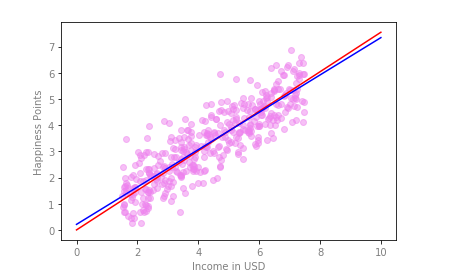

In [251]:
## Test

# Model predict Linear Regression without intercept

income_happi = Data(FILE_PATH)
X_train, y_train, X_test, y_test = income_happi.split(0.8)

Linear_reg = LinearRegression()
Linear_reg.fit(X_train, y_train)
y_pred = Linear_reg.predict(X_test)
evaluation_lin_reg = MSE()
W = Linear_reg.model 
print('The MSE from the Linear Regression Without Intercept is:', evaluation_lin_reg(y_test, y_pred))


# Model predict linear Regression with Intercept
Linear_reg_a = LinearRegressionAffine()
Linear_reg_a.fit(X_train, y_train)

Wa = Linear_reg_a.model
y_pred = Linear_reg_a.predict(X_test)
evaluation_lin_reg_a = MSE() 
print('The MSE from the Linear Regression WITH Intercept is:', evaluation_lin_reg_a(y_test, y_pred))
 
#Graph

X = np.linspace(0, 10 , 100).reshape([100, 1])
Xa = np.hstack((X, np.ones([100, 1])))

plt.scatter(X_train, y_train, alpha=0.5, c='violet')
plt.plot(X, np.matmul(X,W), color= 'red')
plt.plot(X, np.matmul(Xa,Wa), color='blue')

# Title
plt.title('Model comparison: Linear Regression vs Linear Regression with Intercept', c='w')

plt.xlabel('Income in USD', color= 'grey')
plt.ylabel('Happiness Points', color= 'grey')

plt.xticks(c='grey')
plt.yticks(c='grey')

plt.show()